In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as cl
from matplotlib.colorbar import Colorbar
import pandas as pd
import numpy as np
import glob

In [2]:
kep_list = glob.glob('./targetdata/*_kepler.csv')
tess_list = glob.glob('./targetdata/*_tess.csv')

kepler_data = []
tess_data = []

for filename in kep_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    kepler_data.append(df)
for filename in tess_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    tess_data.append(df)
    
kepler_data = pd.concat(kepler_data, axis=0, ignore_index=True)
tess_data = pd.concat(tess_data, axis=0, ignore_index=True)

In [3]:
kic = kepler_data['KIC']
kic_t = tess_data['KIC']
p_r = kepler_data['Santos Period (d)']
p_r_t = tess_data['Santos Period (d)']

ls_kep_a = kepler_data['LS Period 1st peak (d)']
ls_kep_b = kepler_data['LS Period 2nd peak (d)']
ls_kep_c = kepler_data['LS Period 3rd peak (d)']
ls_kep_rms_a = kepler_data['LS Period 1st RMS']
ls_kep_rms_b = kepler_data['LS Period 2nd RMS']
ls_kep_rms_c = kepler_data['LS Period 3rd RMS']
ls_kep_mad_a = kepler_data['LS Period 1st MAD']
ls_kep_mad_b = kepler_data['LS Period 2nd MAD']
ls_kep_mad_c = kepler_data['LS Period 3rd MAD']
ls_kep2_a = kepler_data['LS 2-term Period 1st peak (d)']
ls_kep2_b = kepler_data['LS 2-term Period 2nd peak (d)']
ls_kep2_c = kepler_data['LS 2-term Period 3rd peak (d)']
ls_kep2_rms_a = kepler_data['LS 2-term Period 1st RMS']
ls_kep2_rms_b = kepler_data['LS 2-term Period 2nd RMS']
ls_kep2_rms_c = kepler_data['LS 2-term Period 3rd RMS']
ls_kep2_mad_a = kepler_data['LS 2-term Period 1st MAD']
ls_kep2_mad_b = kepler_data['LS 2-term Period 2nd MAD']
ls_kep2_mad_c = kepler_data['LS 2-term Period 3rd MAD']
acf_kep_a = kepler_data['ACF Period 1st peak (d)']
acf_kep_b = kepler_data['ACF Period 2nd peak (d)']
acf_kep_c = kepler_data['ACF Period 3rd peak (d)']
acf_kep_rms_a = kepler_data['ACF Period 1st RMS']
acf_kep_rms_b = kepler_data['ACF Period 2nd RMS']
acf_kep_rms_c = kepler_data['ACF Period 3rd RMS']
acf_kep_mad_a = kepler_data['ACF Period 1st MAD']
acf_kep_mad_b = kepler_data['ACF Period 2nd MAD']
acf_kep_mad_c = kepler_data['ACF Period 3rd MAD']
ls_med_kep = kepler_data['LS median power']
ls2_med_kep = kepler_data['LS 2-term median power']
rvar_kep = kepler_data['Rvar']
cdpp_kep = kepler_data['CDPP']

ls_tess_a = tess_data['LS Period 1st peak (d)']
ls_tess_b = tess_data['LS Period 2nd peak (d)']
ls_tess_c = tess_data['LS Period 3rd peak (d)']
ls_tess_rms_a = tess_data['LS Period 1st RMS']
ls_tess_rms_b = tess_data['LS Period 2nd RMS']
ls_tess_rms_c = tess_data['LS Period 3rd RMS']
ls_tess_mad_a = tess_data['LS Period 1st MAD']
ls_tess_mad_b = tess_data['LS Period 2nd MAD']
ls_tess_mad_c = tess_data['LS Period 3rd MAD']
ls_tess2_a = tess_data['LS 2-term Period 1st peak (d)']
ls_tess2_b = tess_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c = tess_data['LS 2-term Period 3rd peak (d)']
ls_tess2_rms_a = tess_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b = tess_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c = tess_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a = tess_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b = tess_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c = tess_data['LS 2-term Period 3rd MAD']
acf_tess_a = tess_data['ACF Period 1st peak (d)']
acf_tess_b = tess_data['ACF Period 2nd peak (d)']
acf_tess_c = tess_data['ACF Period 3rd peak (d)']
acf_tess_rms_a = tess_data['ACF Period 1st RMS']
acf_tess_rms_b = tess_data['ACF Period 2nd RMS']
acf_tess_rms_c = tess_data['ACF Period 3rd RMS']
acf_tess_mad_a = tess_data['ACF Period 1st MAD']
acf_tess_mad_b = tess_data['ACF Period 2nd MAD']
acf_tess_mad_c = tess_data['ACF Period 3rd MAD']
ls_med_tess = tess_data['LS median power']
ls2_med_tess = tess_data['LS 2-term median power']
rvar_tess = tess_data['Rvar']
cdpp_tess = tess_data['CDPP']

In [4]:
training_set = pd.read_csv('S21_train.csv')
kic_match = training_set['KIC']
kp_match = training_set['Kp']
teff_match = training_set['Teff']
binary_match = training_set['Flag_Binary']
koi_match = training_set['Flag_KOI']
sph_match = training_set['Sph']

In [5]:
# for kepler
kic_train = kic_match[:np.where(kic_match==max(kic))[0][0]+1].reindex(kic).index.values
kp = [m for (k, m) in zip(kic_match, kp_match) if k in kic.values]
teff = [t for (k, t) in zip(kic_match, teff_match) if k in kic.values]
sph = [s for (k, s) in zip(kic_match, sph_match) if k in kic.values]
flag_binary = [f for (k, f) in zip(kic_match, binary_match) if k in kic.values]
flag_koi = [f for (k, f) in zip(kic_match, koi_match) if k in kic.values]

In [6]:
# for tess
kic_t_train = kic_match[:np.where(kic_match==max(kic_t))[0][0]+1].reindex(kic_t).index.values
kp_t = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t.values]
teff_t = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t.values]
sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]
flag_binary_t = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t.values]
flag_koi_t = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t.values]

In [7]:
diagonal = np.arange(50)
harmonic = diagonal * 2
subharmonic = diagonal / 2

# RMS

<IPython.core.display.Javascript object>


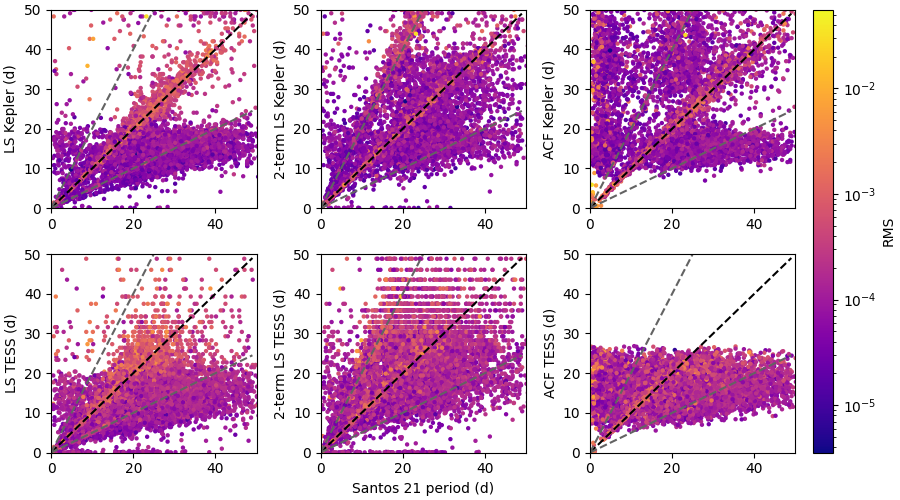

In [7]:
rmsmin = min(min(ls_kep_rms_a), min(ls_kep2_rms_a), min(acf_kep_rms_a), min(ls_tess_rms_a), min(ls_tess2_rms_a), min(acf_tess_rms_a))
rmsmax = max(max(ls_kep_rms_a), max(ls_kep2_rms_a), max(acf_kep_rms_a), max(ls_tess_rms_a), max(ls_tess2_rms_a), max(acf_tess_rms_a))
rmsthresh = rmsmax#np.percentile(np.r_[ls_kep_rms_a, ls_kep2_rms_a, acf_kep_rms_a, ls_tess_rms_a, ls_tess2_rms_a, acf_tess_rms_a, ls_butter_rms_a, ls_butter2_rms_a, acf_butter_rms_a],95)

%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=ls_kep_rms_a, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=ls_kep2_rms_a, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=acf_kep_rms_a, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=ls_tess_rms_a, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=ls_tess2_rms_a, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=acf_tess_rms_a, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('RMS')

fig.set_size_inches(9,5)

<IPython.core.display.Javascript object>


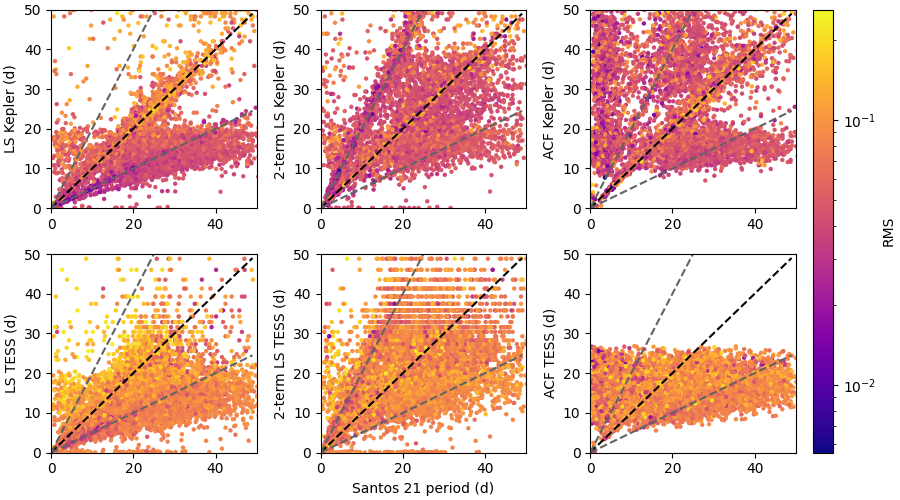

In [8]:
rmsmin = min(min(ls_kep_rms_a/rvar_kep), min(ls_kep2_rms_a/rvar_kep), min(acf_kep_rms_a/rvar_kep), min(ls_tess_rms_a/rvar_tess), min(ls_tess2_rms_a/rvar_tess), min(acf_tess_rms_a/rvar_tess))
rmsmax = max(max(ls_kep_rms_a/rvar_kep), max(ls_kep2_rms_a/rvar_kep), max(acf_kep_rms_a/rvar_kep), max(ls_tess_rms_a/rvar_tess), max(ls_tess2_rms_a/rvar_tess), max(acf_tess_rms_a/rvar_tess))
rmsthresh = rmsmax#np.percentile(np.r_[ls_kep_rms_a, ls_kep2_rms_a, acf_kep_rms_a, ls_tess_rms_a, ls_tess2_rms_a, acf_tess_rms_a, ls_butter_rms_a, ls_butter2_rms_a, acf_butter_rms_a],95)

%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=ls_kep_rms_a/rvar_kep, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=ls_kep2_rms_a/rvar_kep, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=acf_kep_rms_a/rvar_kep, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=ls_tess_rms_a/rvar_tess, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=ls_tess2_rms_a/rvar_tess, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=acf_tess_rms_a/rvar_tess, cmap='plasma', norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('RMS')

fig.set_size_inches(9,5)

# MAD

<IPython.core.display.Javascript object>


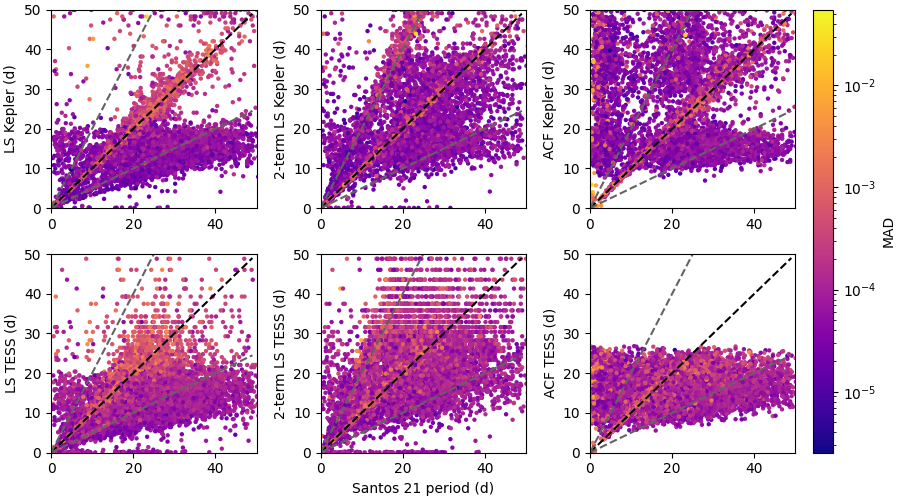

In [9]:
madmin = min(min(ls_kep_mad_a), min(ls_kep2_mad_a), min(acf_kep_mad_a), min(ls_tess_mad_a), min(ls_tess2_mad_a), min(acf_tess_mad_a))
madmax = max(max(ls_kep_mad_a), max(ls_kep2_mad_a), max(acf_kep_mad_a), max(ls_tess_mad_a), max(ls_tess2_mad_a), max(acf_tess_mad_a))
# madthresh = np.percentile(np.r_[ls_kep_mad_a, ls_kep2_mad_a, acf_kep_mad_a, ls_tess_mad_a, ls_tess2_mad_a, acf_tess_mad_a, ls_butter_mad_a, ls_butter2_mad_a, acf_butter_mad_a],80)

%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=ls_kep_mad_a, cmap='plasma', norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=ls_kep2_mad_a, cmap='plasma', norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=acf_kep_mad_a, cmap='plasma', norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=ls_tess_mad_a, cmap='plasma', norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=ls_tess2_mad_a, cmap='plasma', norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=acf_tess_mad_a, cmap='plasma', norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('MAD')

fig.set_size_inches(9,5)

# Rvar

<IPython.core.display.Javascript object>


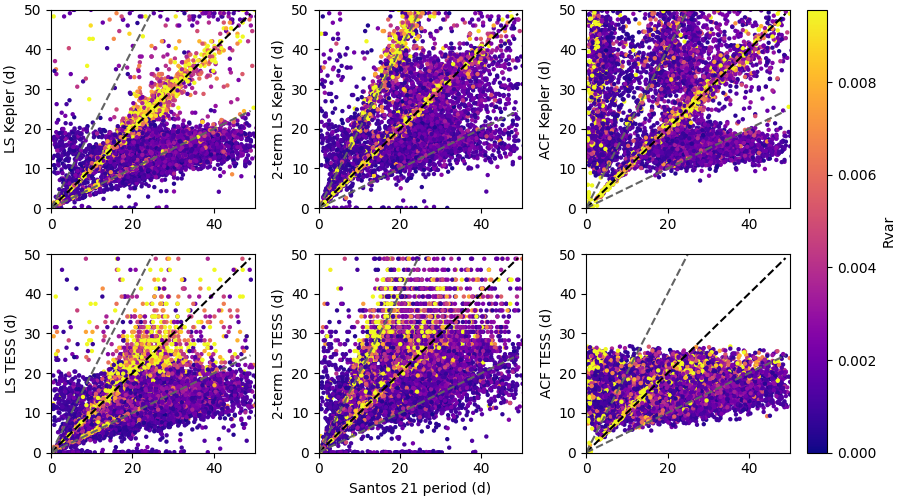

In [10]:
rvarmin = min(min(rvar_kep), min(rvar_tess))
rvarmax = max(max(rvar_kep), max(rvar_tess))
rvarthresh = np.percentile(np.r_[rvar_kep, rvar_tess],80)

%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('Rvar')

fig.set_size_inches(9,5)

<IPython.core.display.Javascript object>


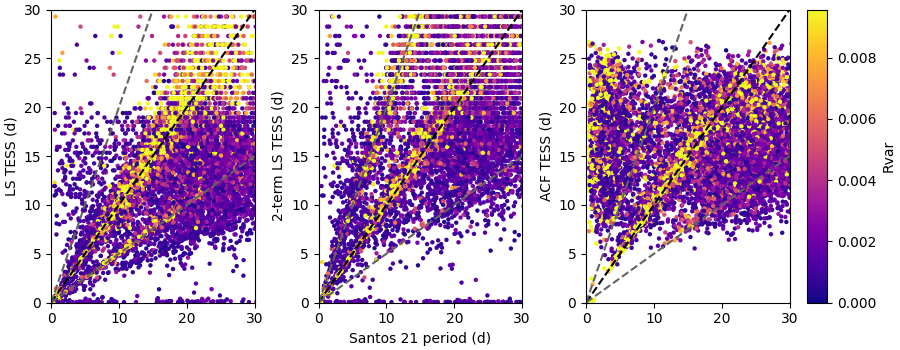

In [11]:
rvarmin = min(min(rvar_kep), min(rvar_tess))
rvarmax = max(max(rvar_kep), max(rvar_tess))
rvarthresh = np.percentile(np.r_[rvar_kep, rvar_tess],80)

%matplotlib notebook
mosaic = """
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,30), xlim=(0,30))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,30), xlim=(0,30), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,30), xlim=(0,30))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('Rvar')

fig.set_size_inches(9,3.5)

# CDPP

<IPython.core.display.Javascript object>


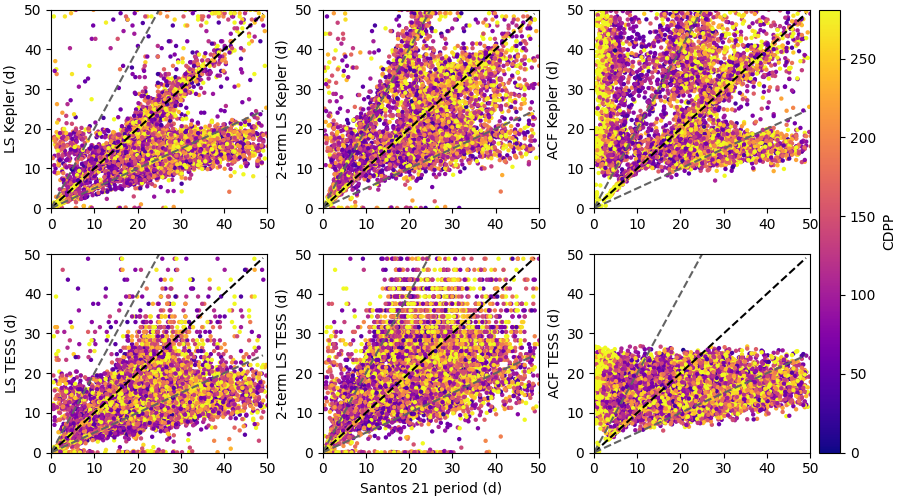

In [11]:
cdppmin = min(min(cdpp_kep), min(cdpp_tess))
cdppmax = max(max(cdpp_kep), max(cdpp_tess))
cdppthresh = np.percentile(np.r_[cdpp_kep, cdpp_tess],80)

%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=cdpp_kep, cmap='plasma', vmin=0, vmax=cdppthresh)#, norm=cl.LogNorm(vmin=cdppmin, vmax=cdppmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=cdpp_kep, cmap='plasma', vmin=0, vmax=cdppthresh)#, norm=cl.LogNorm(vmin=cdppmin, vmax=cdppmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=cdpp_kep, cmap='plasma', vmin=0, vmax=cdppthresh)#, norm=cl.LogNorm(vmin=cdppmin, vmax=cdppmax))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=cdpp_tess, cmap='plasma', vmin=0, vmax=cdppthresh)#, norm=cl.LogNorm(vmin=cdppmin, vmax=cdppmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=cdpp_tess, cmap='plasma', vmin=0, vmax=cdppthresh)#, norm=cl.LogNorm(vmin=cdppmin, vmax=cdppmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=cdpp_tess, cmap='plasma', vmin=0, vmax=cdppthresh)#, norm=cl.LogNorm(vmin=cdppmin, vmax=cdppmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('CDPP')

fig.set_size_inches(9,5)

# Magnitude

<IPython.core.display.Javascript object>


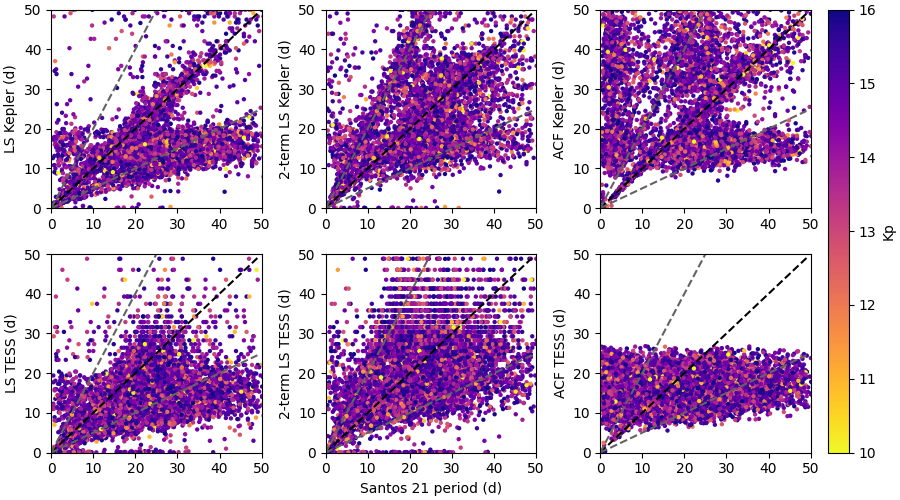

In [35]:
%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=kp, cmap='plasma_r', vmin=10, vmax=16)
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=kp, cmap='plasma_r', vmin=10, vmax=16)
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=kp, cmap='plasma_r', vmin=10, vmax=16)
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=kp_t, cmap='plasma_r', vmin=10, vmax=16)
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=kp_t, cmap='plasma_r', vmin=10, vmax=16)
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=kp_t, cmap='plasma_r', vmin=10, vmax=16)
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('Kp')

fig.set_size_inches(9,5)

# Temperature

<IPython.core.display.Javascript object>


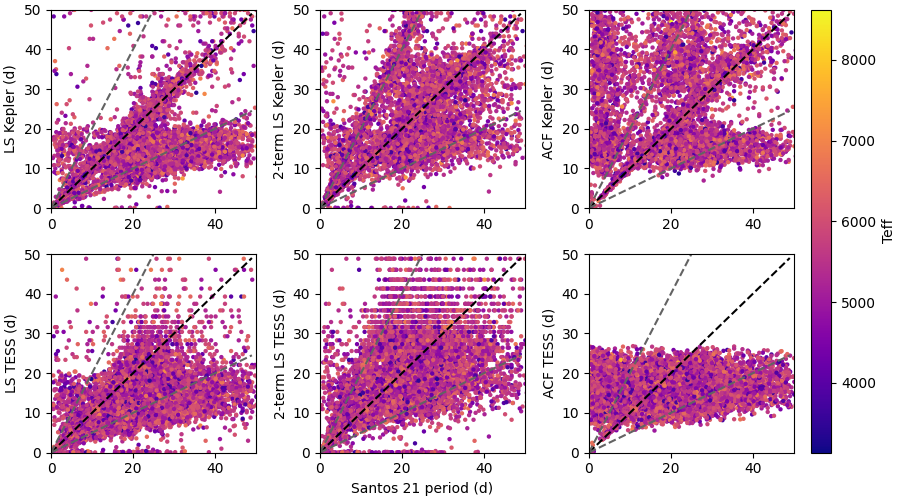

In [36]:
%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=teff, cmap='plasma', vmin=min(teff), vmax=max(teff))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=teff, cmap='plasma', vmin=min(teff), vmax=max(teff))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=teff, cmap='plasma', vmin=min(teff), vmax=max(teff))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=teff_t, cmap='plasma', vmin=min(teff_t), vmax=max(teff_t))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=teff_t, cmap='plasma', vmin=min(teff_t), vmax=max(teff_t))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=teff_t, cmap='plasma', vmin=min(teff_t), vmax=max(teff_t))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('Teff')

fig.set_size_inches(9,5)

# Sph

<IPython.core.display.Javascript object>


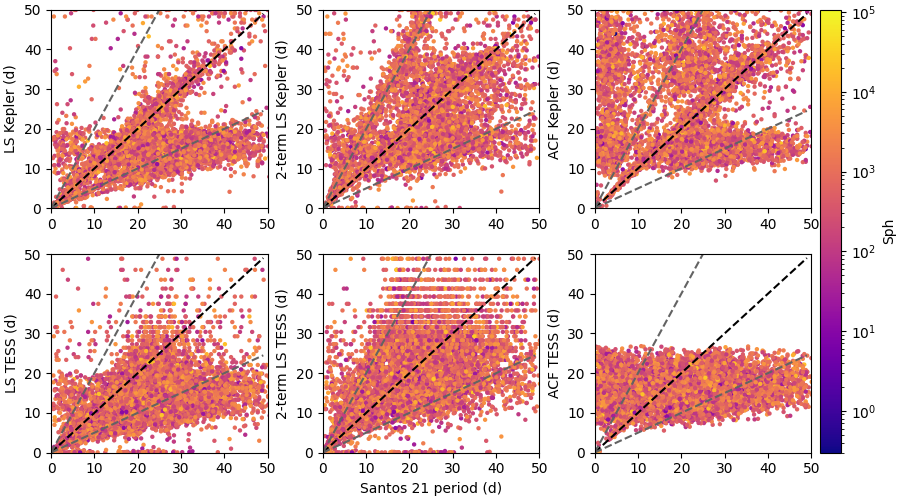

In [37]:
%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=sph, cmap='plasma', norm=cl.LogNorm(vmin=min(sph), vmax=max(sph)))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=sph, cmap='plasma', norm=cl.LogNorm(vmin=min(sph), vmax=max(sph)))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=sph, cmap='plasma', norm=cl.LogNorm(vmin=min(sph), vmax=max(sph)))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=sph_t, cmap='plasma', norm=cl.LogNorm(vmin=min(sph_t), vmax=max(sph_t)))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=sph_t, cmap='plasma', norm=cl.LogNorm(vmin=min(sph_t), vmax=max(sph_t)))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=sph_t, cmap='plasma', norm=cl.LogNorm(vmin=min(sph_t), vmax=max(sph_t)))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('Sph')

fig.set_size_inches(9,5)

# Flagged as binary

In [42]:
b_flags = [-1 if f==-999 else 1 if f==2 else 1 if f==3 else f for f in flag_binary]
b_flags_t = [-1 if f==-999 else 1 if f==2 else 1 if f==3 else f for f in flag_binary_t]
b_cols = [(0, 0.513, 0.878, 0.75), (0.223, 0.231, 0.235,0.25), (0.878, 0, 0.223,1)] # -999 unknown, 0 single stars, 1-2-3 binary candidates
b_cmap = cl.LinearSegmentedColormap.from_list('binary flags', b_cols, N=3)
b_labels = ['unknown', 'single star', 'binary candidate']

<IPython.core.display.Javascript object>


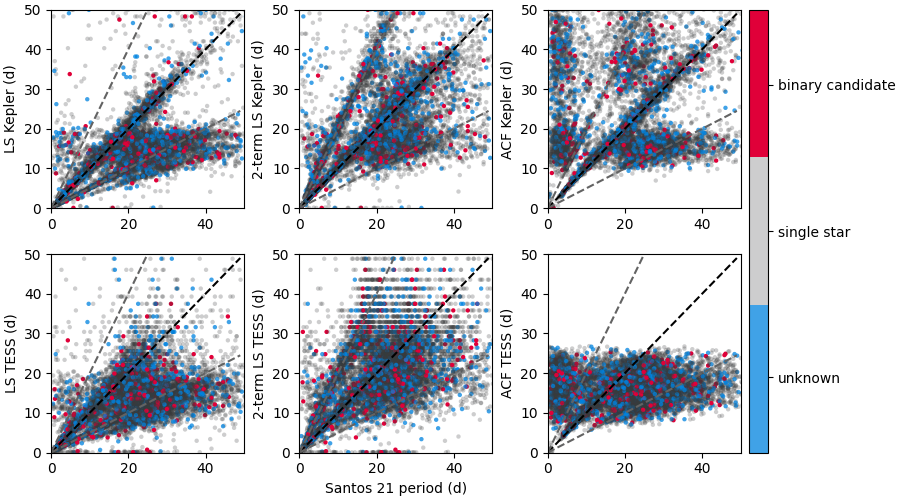

In [41]:
%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=b_flags, cmap=b_cmap)
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=b_flags, cmap=b_cmap)
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=b_flags, cmap=b_cmap)
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=b_flags_t, cmap=b_cmap)
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=b_flags_t, cmap=b_cmap)
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=b_flags_t, cmap=b_cmap)
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])
cb.set_ticks([-0.66,0,0.66])
cb.set_ticklabels(b_labels)

fig.set_size_inches(9,5)

# Flagged as KOI

In [43]:
k_flags = [-2 if f==-999 else f for f in flag_koi]
k_flags_t = [-2 if f==-999 else f for f in flag_koi_t]
k_cols = [(0.223, 0.231, 0.235,0.25), (0.878, 0, 0.223,1), (0.164, 0.764, 0.094, 1), (0.988, 0.815, 0.152, 1)] # -2 not KOI, 0 planet, 1 candidate, -1 false pos
k_cmap = cl.LinearSegmentedColormap.from_list('koi flags', k_cols, N=4)
k_labels = ['not a KOI', 'false positive', 'confirmed planet', 'planet candidate']

<IPython.core.display.Javascript object>


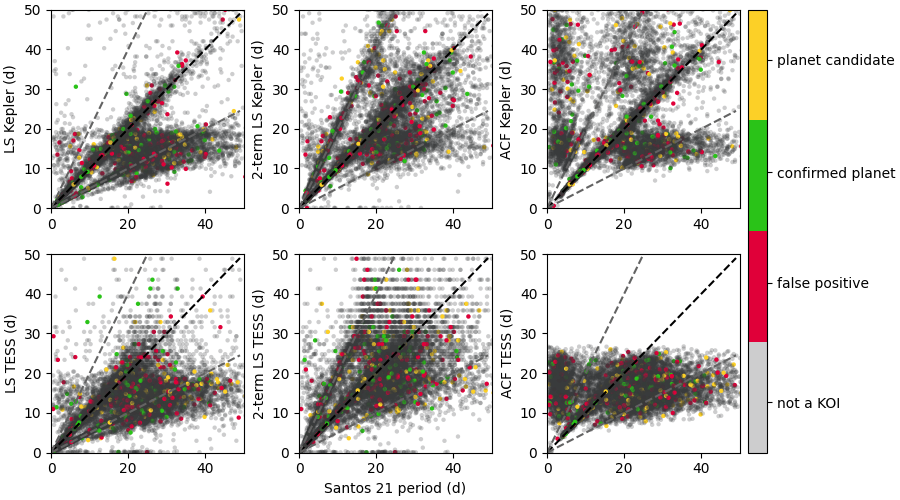

In [44]:
%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=k_flags, cmap=k_cmap)
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=k_flags, cmap=k_cmap)
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_a, s=10, lw=0, c=k_flags, cmap=k_cmap)
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=k_flags_t, cmap=k_cmap)
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=k_flags_t, cmap=k_cmap)
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_a, s=10, lw=0, c=k_flags_t, cmap=k_cmap)
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])
cb.set_ticks([-1.66, -0.85, -0.1, 0.66])
cb.set_ticklabels(k_labels)

fig.set_size_inches(9,5)

# LS median power

<IPython.core.display.Javascript object>


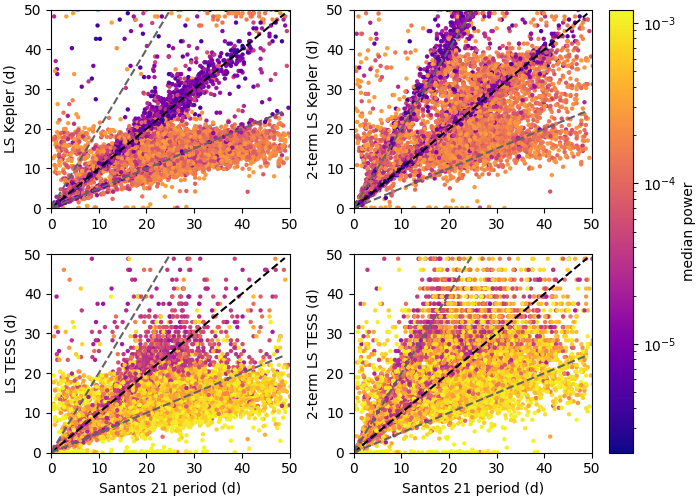

In [11]:
medmin = min(min(ls_med_kep), min(ls2_med_kep), min(ls_med_tess), min(ls2_med_tess))
medmax = max(max(ls_med_kep), max(ls2_med_kep), max(ls_med_tess), max(ls2_med_tess))

%matplotlib notebook
mosaic = """
    ABx
    DEx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=ls_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=ls2_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_a, s=10, lw=0, c=ls_med_tess, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_a, s=10, lw=0, c=ls2_med_tess, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('median power')

fig.set_size_inches(7,5)

<IPython.core.display.Javascript object>


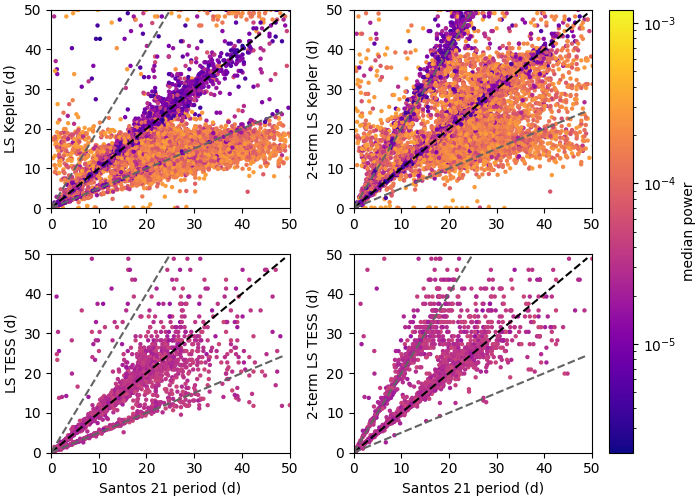

In [46]:
medmin = min(min(ls_med_kep), min(ls2_med_kep), min(ls_med_tess), min(ls2_med_tess))
medmax = max(max(ls_med_kep), max(ls2_med_kep), max(ls_med_tess), max(ls2_med_tess))
medthresh = 0.00005

%matplotlib notebook
mosaic = """
    ABx
    DEx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_a, s=10, lw=0, c=ls_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_a, s=10, lw=0, c=ls2_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t[ls_med_tess<medthresh], ls_tess_a[ls_med_tess<medthresh], s=10, lw=0, c=ls_med_tess[ls_med_tess<medthresh], cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t[ls2_med_tess<medthresh], ls_tess2_a[ls2_med_tess<medthresh], s=10, lw=0, c=ls2_med_tess[ls2_med_tess<medthresh], cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('median power')

fig.set_size_inches(7,5)

# Rvar for 2nd and 3rd peaks

<IPython.core.display.Javascript object>


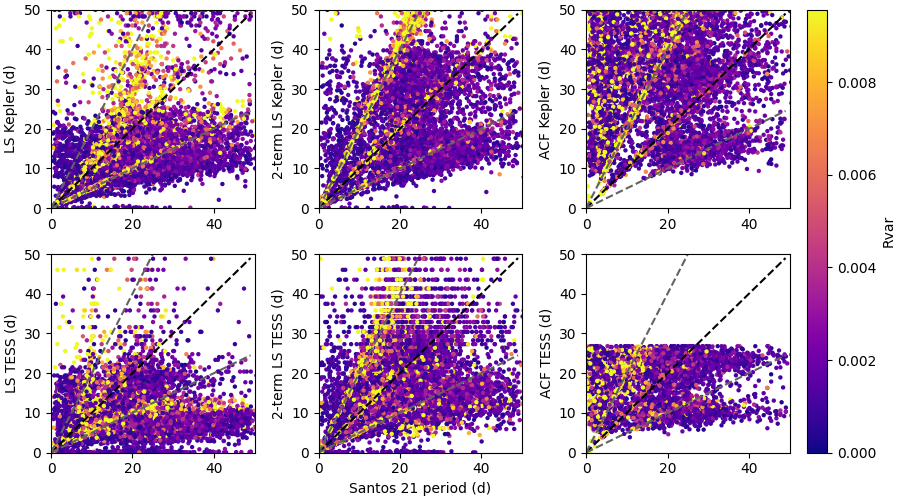

In [47]:
rvarmin = min(min(rvar_kep), min(rvar_tess))
rvarmax = max(max(rvar_kep), max(rvar_tess))
rvarthresh = np.percentile(np.r_[rvar_kep, rvar_tess],80)

%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_b, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_b, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_b, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_b, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_b, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_b, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('Rvar')

fig.set_size_inches(9,5)

<IPython.core.display.Javascript object>


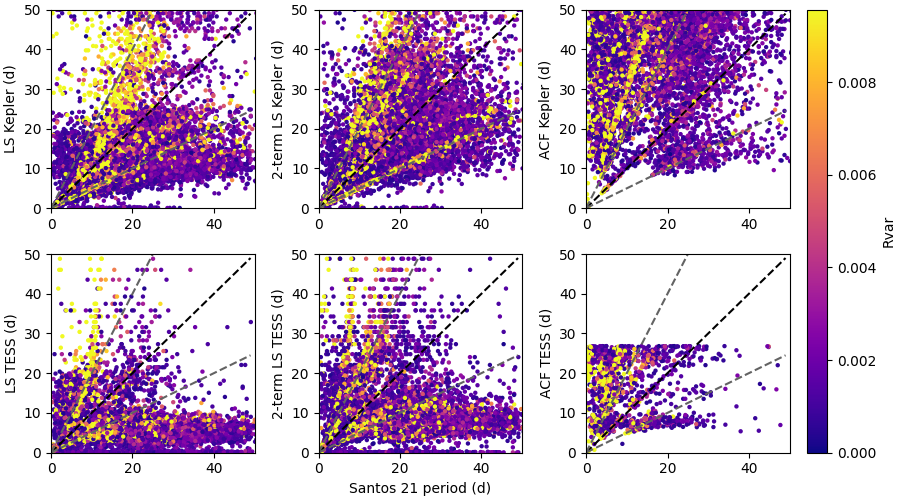

In [48]:
rvarmin = min(min(rvar_kep), min(rvar_tess))
rvarmax = max(max(rvar_kep), max(rvar_tess))
rvarthresh = np.percentile(np.r_[rvar_kep, rvar_tess],80)

%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_c, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_c, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['C'].plot(diagonal, diagonal, '--', c='#000000')
ax['C'].plot(diagonal, harmonic, '--', c='#636363')
ax['C'].plot(diagonal, subharmonic, '--', c='#636363')
ax['C'].scatter(p_r, acf_kep_c, s=10, lw=0, c=rvar_kep, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['C'].set(ylabel='ACF Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_c, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50))

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_c, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['F'].plot(diagonal, diagonal, '--', c='#000000')
ax['F'].plot(diagonal, harmonic, '--', c='#636363')
ax['F'].plot(diagonal, subharmonic, '--', c='#636363')
ax['F'].scatter(p_r_t, acf_tess_c, s=10, lw=0, c=rvar_tess, cmap='plasma', vmin=0, vmax=rvarthresh)#, norm=cl.LogNorm(vmin=rvarmin, vmax=rvarmax))
ax['F'].set(ylabel='ACF TESS (d)', ylim=(0,50), xlim=(0,50))

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('Rvar')

fig.set_size_inches(9,5)

# Median power for 2nd and 3rd peaks

<IPython.core.display.Javascript object>


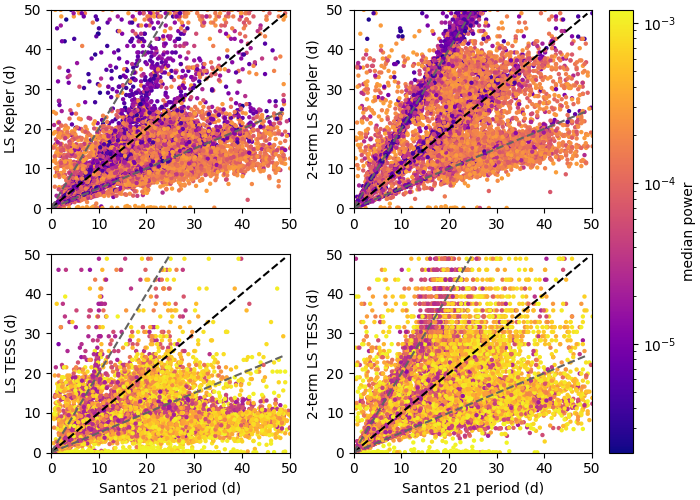

In [49]:
medmin = min(min(ls_med_kep), min(ls2_med_kep), min(ls_med_tess), min(ls2_med_tess))
medmax = max(max(ls_med_kep), max(ls2_med_kep), max(ls_med_tess), max(ls2_med_tess))

%matplotlib notebook
mosaic = """
    ABx
    DEx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_b, s=10, lw=0, c=ls_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_b, s=10, lw=0, c=ls2_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_b, s=10, lw=0, c=ls_med_tess, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_b, s=10, lw=0, c=ls2_med_tess, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('median power')

fig.set_size_inches(7,5)

<IPython.core.display.Javascript object>


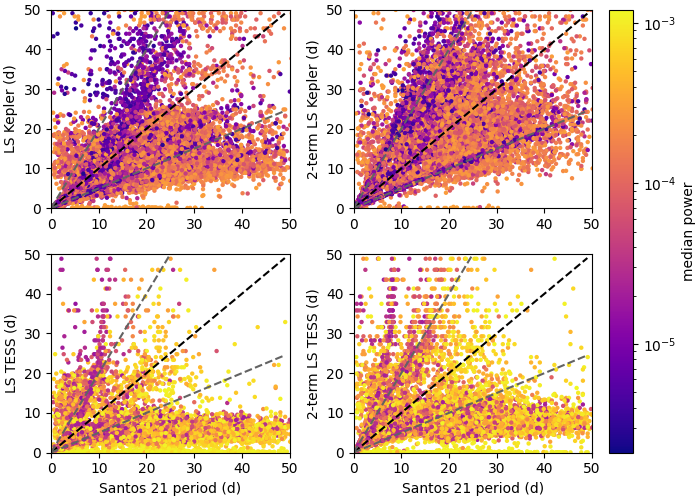

In [50]:
medmin = min(min(ls_med_kep), min(ls2_med_kep), min(ls_med_tess), min(ls2_med_tess))
medmax = max(max(ls_med_kep), max(ls2_med_kep), max(ls_med_tess), max(ls2_med_tess))

%matplotlib notebook
mosaic = """
    ABx
    DEx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,0.1]})

ax['A'].plot(diagonal, diagonal, '--', c='#000000')
ax['A'].plot(diagonal, harmonic, '--', c='#636363')
ax['A'].plot(diagonal, subharmonic, '--', c='#636363')
colours = ax['A'].scatter(p_r, ls_kep_c, s=10, lw=0, c=ls_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['A'].set(ylabel='LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['B'].plot(diagonal, diagonal, '--', c='#000000')
ax['B'].plot(diagonal, harmonic, '--', c='#636363')
ax['B'].plot(diagonal, subharmonic, '--', c='#636363')
ax['B'].scatter(p_r, ls_kep2_c, s=10, lw=0, c=ls2_med_kep, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['B'].set(ylabel='2-term LS Kepler (d)', ylim=(0,50), xlim=(0,50))

ax['D'].plot(diagonal, diagonal, '--', c='#000000')
ax['D'].plot(diagonal, harmonic, '--', c='#636363')
ax['D'].plot(diagonal, subharmonic, '--', c='#636363')
ax['D'].scatter(p_r_t, ls_tess_c, s=10, lw=0, c=ls_med_tess, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['D'].set(ylabel='LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

ax['E'].plot(diagonal, diagonal, '--', c='#000000')
ax['E'].plot(diagonal, harmonic, '--', c='#636363')
ax['E'].plot(diagonal, subharmonic, '--', c='#636363')
ax['E'].scatter(p_r_t, ls_tess2_c, s=10, lw=0, c=ls2_med_tess, cmap='plasma', norm=cl.LogNorm(vmin=medmin, vmax=medmax))
ax['E'].set(ylabel='2-term LS TESS (d)', ylim=(0,50), xlim=(0,50), xlabel='Santos 21 period (d)')

cb = plt.colorbar(colours, cax=ax['x'])#, ticks=[1.33, 2.66])
# cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('median power')

fig.set_size_inches(7,5)